In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df_games = pd.read_csv('games.csv')
print(df_games.head(10))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.columns = df_games.columns.str.lower()
print(df_games)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

## . Alterando os tipo de dados das colunas e substituindo valores ausentes.

In [5]:
df_games['user_score'] = df_games['user_score'].replace('tbd', '0')
df_games['user_score'] = df_games['user_score'].astype(float)
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64').astype(str)
df_games['year_of_release'] = df_games['year_of_release'].fillna('desconhecido')
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce')
df_games = df_games.dropna(subset=['year_of_release'])
df_games

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16446 rows x 11 columns]

In [6]:
df_games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

Substituindo os valores ausentes das colunas categoricas.

In [7]:
df_games.dropna(subset=['name', 'genre'], inplace=True)
df_games.fillna({'rating': 'desconhecido'}, inplace=True)


In [8]:

df_games['total_sales'] = df_games[['na_sales',  'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games['total_sales'] = df_games['total_sales'].astype('int64')
df_games

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

             rating  total_sales  
0                 E           82  
1      desconhecido           40  
2                 E           35  
3                 E           32  
4      desconhecido           31  
...             ...          ...  
16710  desconhecido            0  
16711  desconhecido            0  
16712  desconhecido            0  
16713  desconhecido            0  
16714  desconhecido            0  

[16444 rows x 12 columns]

Nosso objetivo com esse projeto é montar uma estrategia de vendas para o proximo ano, e com isso em mente, trabalharemos com mais frequencia com as colunas dos produtos, das plataformas, vendas, ano e regiões (claramente as outras colunas tem sua devida importancia). Como temos muitos valores ausentes nas colunas: ['critic_score', 'user_score', 'rating'], obtei por deixa-las no df, ate porque seus valores não teram um impacto significativo no nosso objetivo final, porém, usaremos o pouco que temos para fazermos estudos de correlações com a finalidade de avaliarmos determinadas hipoteses comportamentais.

Excluimos dois valores ausentes das colunas ['name', 'genre']. Não terá nenhum impacto no nosso objetivo final.


# .Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?

contando o numero de jogos por ano.

In [9]:
games_per_year = df_games['year_of_release'].value_counts().sort_index()

print(games_per_year)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64


Visualizando os dados em grafico.

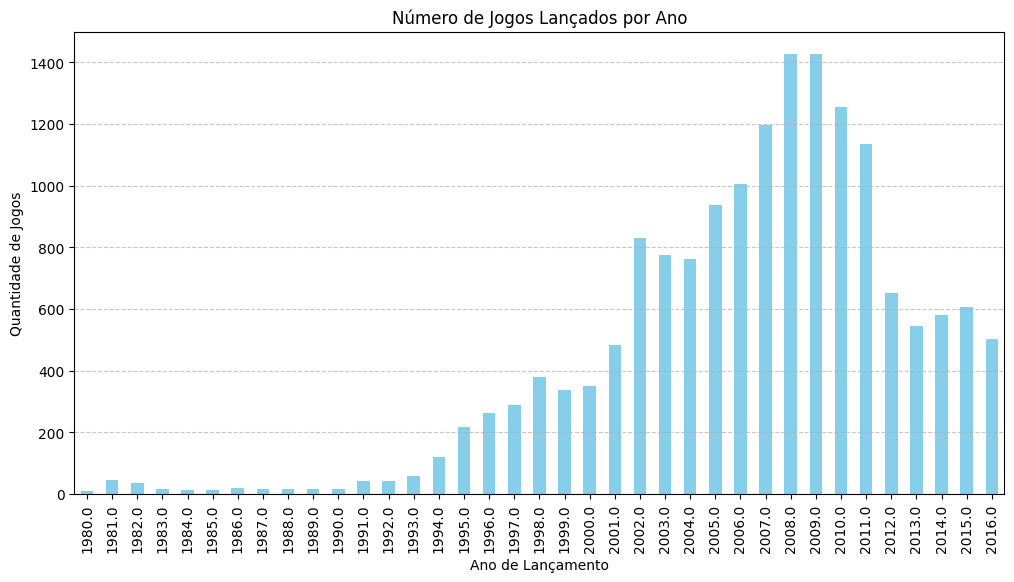

In [10]:
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de Jogos Lançados por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Os dados do periodo de 2001 até 2016, são os mais significativos em relação aos do periodo de 1980 até 2000.

# .Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

In [11]:
# 1. Identificar as plataformas com maiores vendas totais
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(10) # Selecionando as 10 plataformas com maiores vendas


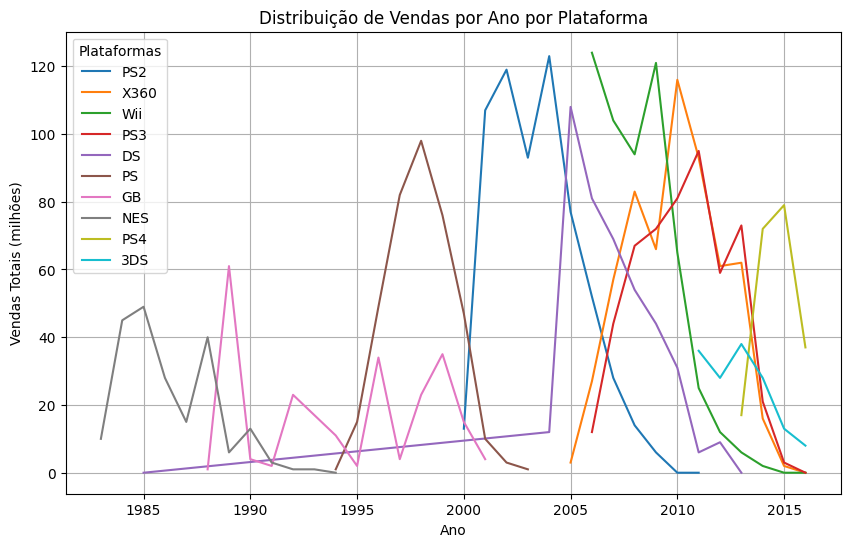

In [12]:
# 2. Construir a distribuição de vendas por ano para as plataformas com maiores vendas
top_platforms_data = df_games[df_games['platform'].isin(top_platforms.index)]
plt.figure(figsize=(10, 6))
for platform in top_platforms.index:
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    platform_sales_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_sales_year.index, platform_sales_year.values, label=platform)

plt.title('Distribuição de Vendas por Ano por Plataforma')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (milhões)')
plt.legend(title="Plataformas")
plt.grid(True)
plt.show()


In [13]:
# 3. Identificar plataformas com vendas zero nos últimos anos
no_sales_platforms = df_games[df_games['total_sales'] == 0]['platform'].unique()
print("Plataformas com vendas zero:", no_sales_platforms)

Plataformas com vendas zero: ['XB' 'X360' 'PS3' 'PS' 'PS2' 'GC' 'DS' 'PSP' 'Wii' 'PS4' 'PC' 'GBA' 'NES'
 'N64' 'SNES' '2600' '3DS' 'XOne' 'GB' 'WiiU' 'PSV' 'SAT' 'DC' 'WS' 'GEN'
 'NG' 'SCD' 'TG16' '3DO' 'GG' 'PCFX']


In [14]:
# 4. Identificar novas plataformas e o desaparecimento das antigas
# Vamos verificar as plataformas e anos de lançamento
platforms_by_year = df_games.groupby(['year_of_release', 'platform']).size().unstack().fillna(0)


In [15]:
# Garantir que estamos lidando com dados numéricos e não com valores NaN
platforms_by_year_new = platforms_by_year[platforms_by_year > 0]
platforms_by_year_new_df = platforms_by_year_new.fillna(0)


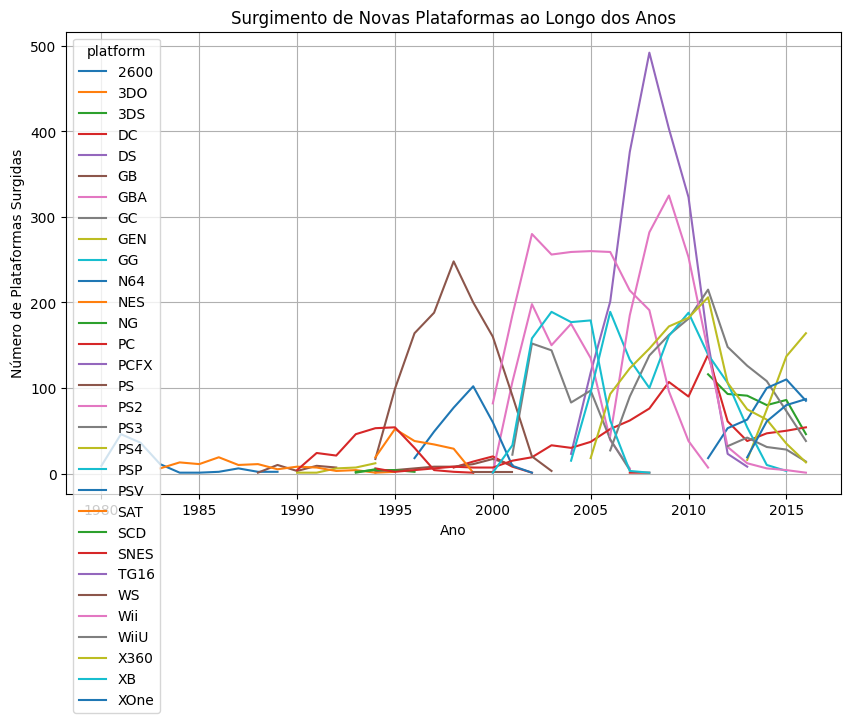

In [16]:
# Visualização do surgimento de plataformas ao longo dos anos
platforms_by_year_new.plot(figsize=(10, 6), kind='line', legend=True)
plt.title('Surgimento de Novas Plataformas ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Plataformas Surgidas')
plt.grid(True)
plt.show()

# .Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

# .Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

In [17]:
# 1. Identificar as plataformas que estão liderando em vendas
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(10)  # Selecionando as 10 plataformas com maiores vendas
print("Plataformas que estão liderando em vendas:")
print(top_platforms)

Plataformas que estão liderando em vendas:
platform
PS2     632
X360    586
Wii     553
PS3     527
DS      414
PS      382
GB      219
NES     211
PS4     205
3DS     151
Name: total_sales, dtype: int64


PS2 tem o maior numero de vendas, seguido por X360, Wii, PS3, DS, PS, BG, NES, PS4, 3DS.

In [18]:
# 2. Analisar o crescimento ou diminuição das plataformas ao longo dos anos 
platform_sales_by_year = df_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

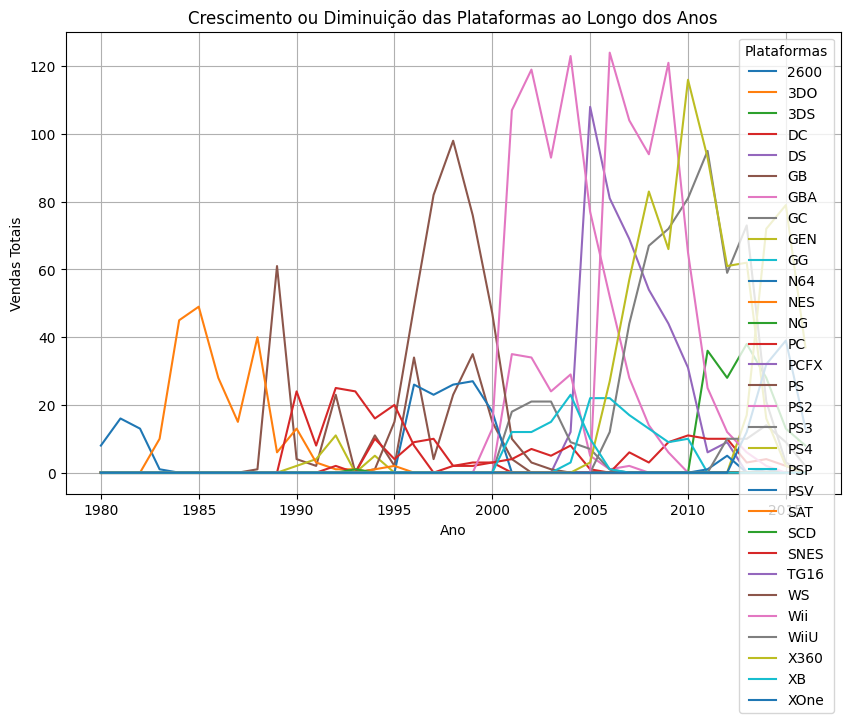

In [19]:
# Visualizar o crescimento ou diminuição ao longo dos anos
plt.figure(figsize=(10, 6))
for platform in platform_sales_by_year.columns:
    plt.plot(platform_sales_by_year.index, platform_sales_by_year[platform], label=platform)

plt.title('Crescimento ou Diminuição das Plataformas ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais')
plt.legend(title="Plataformas")
plt.grid(True)
plt.show()

Nosso grafico nos mostra que ambas plataformas tendem a ter uma explosão de vendas no seu lançamento, e nos anos posteriores ao seu lançamento, o crescimento diminui drasticamente.

In [20]:
# 3. Identificar plataformas potencialmente lucrativas
# Plataformas com vendas altas nos últimos anos e que mostram tendência de crescimento
recent_sales = platform_sales_by_year.loc[platform_sales_by_year.index > 2010].sum()
growing_platforms = recent_sales[recent_sales > recent_sales.mean()]  # Plataformas com vendas acima da média recente
print("\nPlataformas potencialmente lucrativas:")
print(growing_platforms)


Plataformas potencialmente lucrativas:
platform
3DS     151.0
PS3     251.0
PS4     205.0
Wii      45.0
WiiU     45.0
X360    234.0
XOne     96.0
dtype: float64


Temos 3 principais plataformas com mais vendas: 'PS3', 'X360', 'PS4' (com base em anos mais recentes), o que nos mostra que elas podem representar possiveis potenciais para os proximos anos em vendas.

# .Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

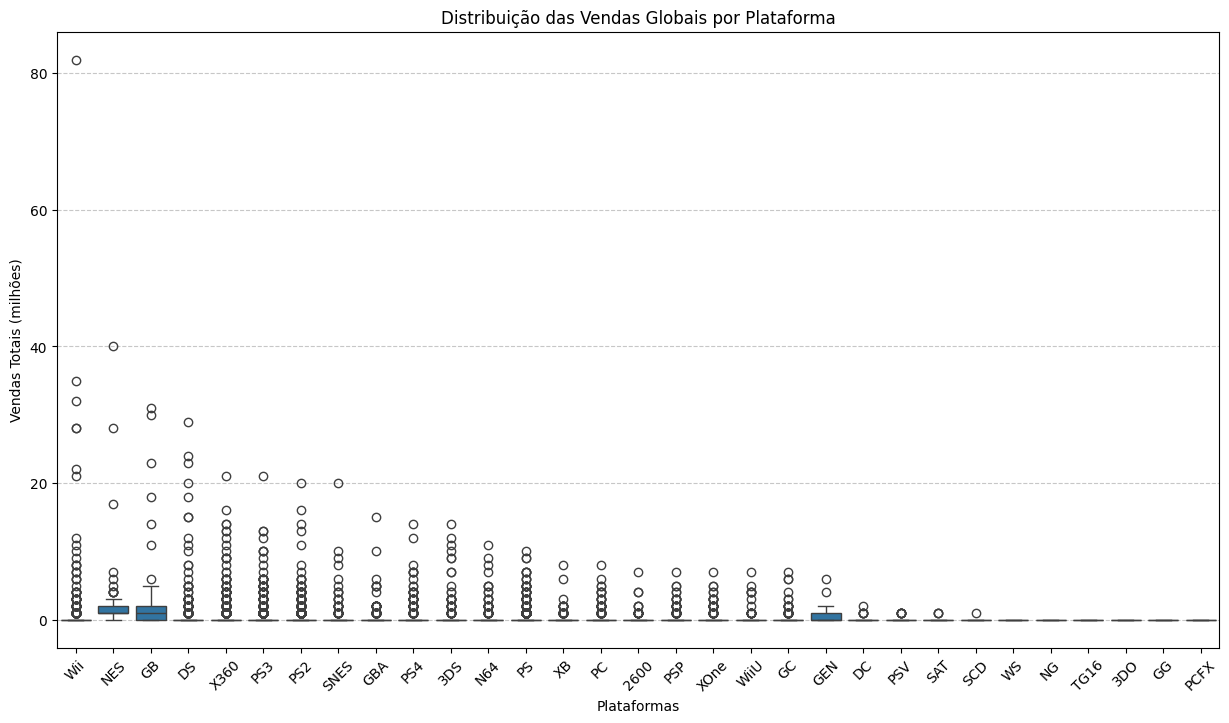

In [21]:
# 1. Construindo o Diagrama de Caixa 
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games, x='platform', y='total_sales', showfliers=True)
plt.title('Distribuição das Vendas Globais por Plataforma')
plt.xlabel('Plataformas')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
# 2. Calcular as Vendas Médias por Plataforma
mean_sales = df_games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("\nVendas Médias por Plataforma:")
print(mean_sales)


Vendas Médias por Plataforma:
platform
GB      2.257732
NES     2.153061
GEN     0.814815
SNES    0.523013
PS4     0.522959
X360    0.475649
Wii     0.430016
PS3     0.403522
XOne    0.388664
N64     0.379747
2600    0.327586
PS      0.321008
WiiU    0.306122
PS2     0.297132
3DS     0.294922
DS      0.195191
SCD     0.166667
GBA     0.160296
GC      0.142066
DC      0.134615
PC      0.131661
XB      0.090909
PSP     0.080469
SAT     0.017341
PSV     0.016317
GG      0.000000
3DO     0.000000
PCFX    0.000000
NG      0.000000
WS      0.000000
TG16    0.000000
Name: total_sales, dtype: float64


As plataformas lideres em vendas são: 'GB' com 2.25 e 'NES' com 2.15 de vendas. As diferenças nas vendas médias são significativas.

In [23]:
# 3. Identificar Diferenças Significativas e comparar as vendas medias entre as plataformas
median_sales = df_games.groupby('platform')['total_sales'].median().sort_values(ascending=False)
print("\nMedianas das Vendas por Plataforma:")
print(median_sales)


Medianas das Vendas por Plataforma:
platform
GB      1.0
NES     1.0
3DO     0.0
3DS     0.0
DC      0.0
DS      0.0
2600    0.0
GBA     0.0
GC      0.0
GG      0.0
GEN     0.0
N64     0.0
NG      0.0
PC      0.0
PCFX    0.0
PS      0.0
PS2     0.0
PS3     0.0
PS4     0.0
PSP     0.0
PSV     0.0
SAT     0.0
SCD     0.0
SNES    0.0
TG16    0.0
WS      0.0
Wii     0.0
WiiU    0.0
X360    0.0
XB      0.0
XOne    0.0
Name: total_sales, dtype: float64


A maioria das plataformas tem uma mediana de vendas de 0.0 milhões, o que indica que:

.Muitas plataformas possuem uma grande quantidade de jogos com vendas baixas ou insignificantes.

.A média (analisada anteriormente) é puxada para cima por alguns títulos de grande sucesso, mas a mediana reflete que, para a maioria dos jogos, as vendas foram muito modestas.

In [24]:
std_sales = df_games.groupby('platform')['total_sales'].std().sort_values(ascending=False)
print("\nDesvio Padrão das Vendas por Plataforma:")
print(std_sales)


Desvio Padrão das Vendas por Plataforma:
platform
GB      5.406937
NES     5.135990
Wii     3.122057
SNES    1.814534
X360    1.581080
PS4     1.506841
GEN     1.415220
DS      1.389854
3DS     1.363823
PS3     1.344876
N64     1.242668
PS2     1.064304
WiiU    1.010982
PS      0.986611
XOne    0.959946
2600    0.921019
GBA     0.830857
GC      0.617162
PC      0.601089
XB      0.463592
PSP     0.452690
SCD     0.408248
DC      0.397485
SAT     0.130918
PSV     0.126840
NG      0.000000
3DO     0.000000
WS      0.000000
TG16    0.000000
GG           NaN
PCFX         NaN
Name: total_sales, dtype: float64


As plataformas com maior desvio padrão são:

. GB (5.41 milhões)

. NES (5.14 milhões)

. Wii (3.12 milhões)

Esses valores indicam que, nessas plataformas, há uma ampla disparidade nas vendas dos jogos. Isso significa que:

. Algumas franquias tiveram vendas extremamente altas (como Pokémon no GB e Mario no NES), enquanto outros jogos tiveram vendas mais modestas.

. A alta variabilidade sugere a presença de outliers positivos (títulos de enorme sucesso que elevam a média).




# . Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

In [25]:
plataforma_ps4 = df_games[df_games['platform'] == 'PS4']
plataforma_filtrada = plataforma_ps4[['critic_score', 'user_score', 'total_sales']].dropna()
plataforma_filtrada['user_score'] = pd.to_numeric(plataforma_filtrada['user_score'], errors='coerce')
plataforma_filtrada = plataforma_filtrada.dropna()



In [26]:
critica_corr = plataforma_filtrada['critic_score'].corr(plataforma_filtrada['total_sales'])
usuario_corr = plataforma_filtrada['user_score'].corr(plataforma_filtrada['total_sales'])

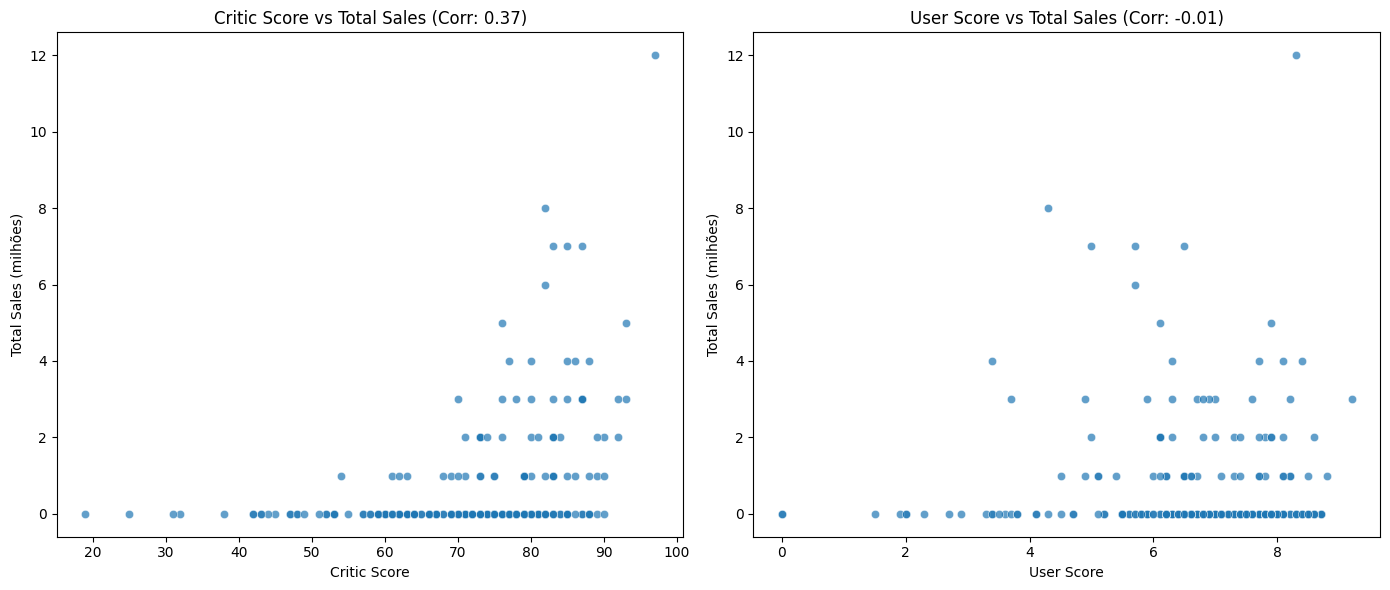

(np.float64(0.369769337029078), np.float64(-0.013922730592254276))

In [27]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='critic_score', y='total_sales', data=plataforma_filtrada, alpha=0.7)
plt.title(f'Critic Score vs Total Sales (Corr: {critica_corr:.2f})')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (milhões)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='user_score', y='total_sales', data=plataforma_filtrada, alpha=0.7)
plt.title(f'User Score vs Total Sales (Corr: {usuario_corr:.2f})')
plt.xlabel('User Score')
plt.ylabel('Total Sales (milhões)')

plt.tight_layout()
plt.show()

critica_corr, usuario_corr

No grafico podemos fazer algumas observações:

Pontuação Crítica:

Há uma tendência de aumento nas vendas para jogos com pontuações mais altas dos críticos.
Alguns jogos com vendas muito altas tiveram notas médias a altas, mas não há uma correlação perfeita.

User Score:

A dispersão dos dados é grande, sem um padrão claro. Isso reforça que as opiniões dos usuários têm pouco impacto direto nas vendas.

. Pontuação Crítica vs Total Sales:  Correlação de 0.36, indicando uma relação moderada e positiva. Isso sugere que jogos bem avaliados por críticos tendem a vender mais, embora outros fatores também influenciem as vendas.

. Pontuação do Usuário vs Total Sales:  Correlação de -0.01, indicando uma relação muito fraca ou inexistente. As avaliações dos usuários não parecem influenciar significativamente as vendas.

# . Com essas conclusões em mente, compare as vendas em outras plataformas.

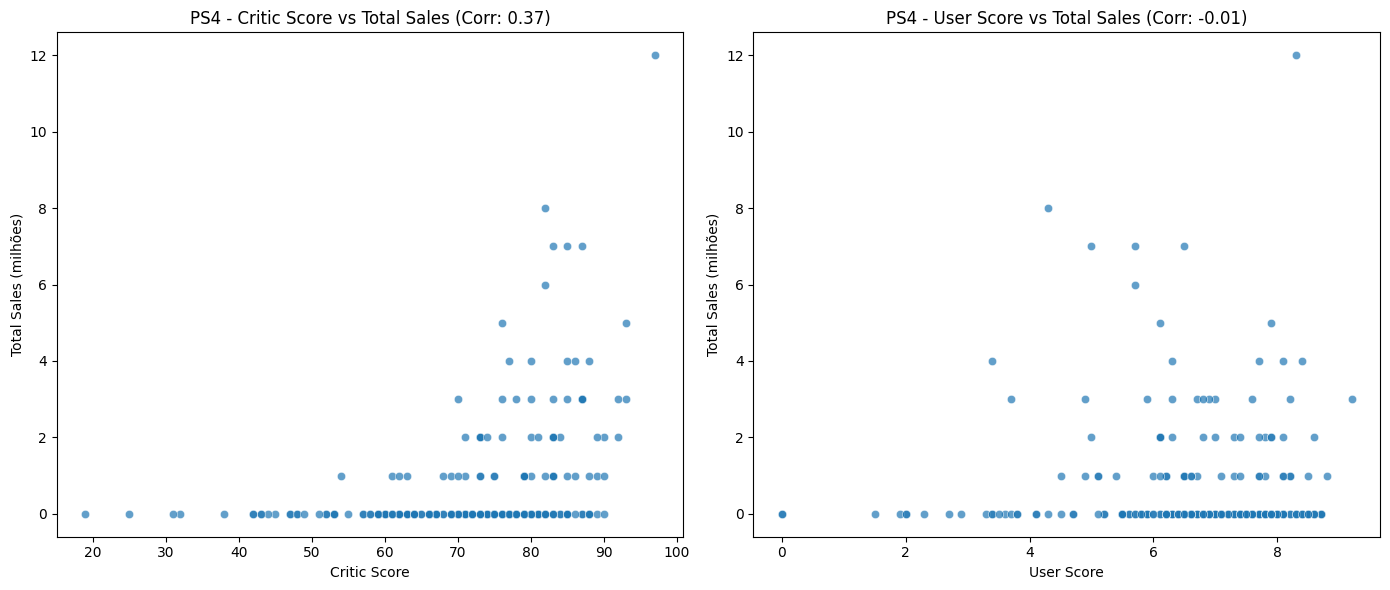

Plataforma: PS4
Correlação Pontuação Crítica x Total Sales: 0.37
Correlação Pontuação Usuario x Total Sales: -0.01
--------------------------------------------------


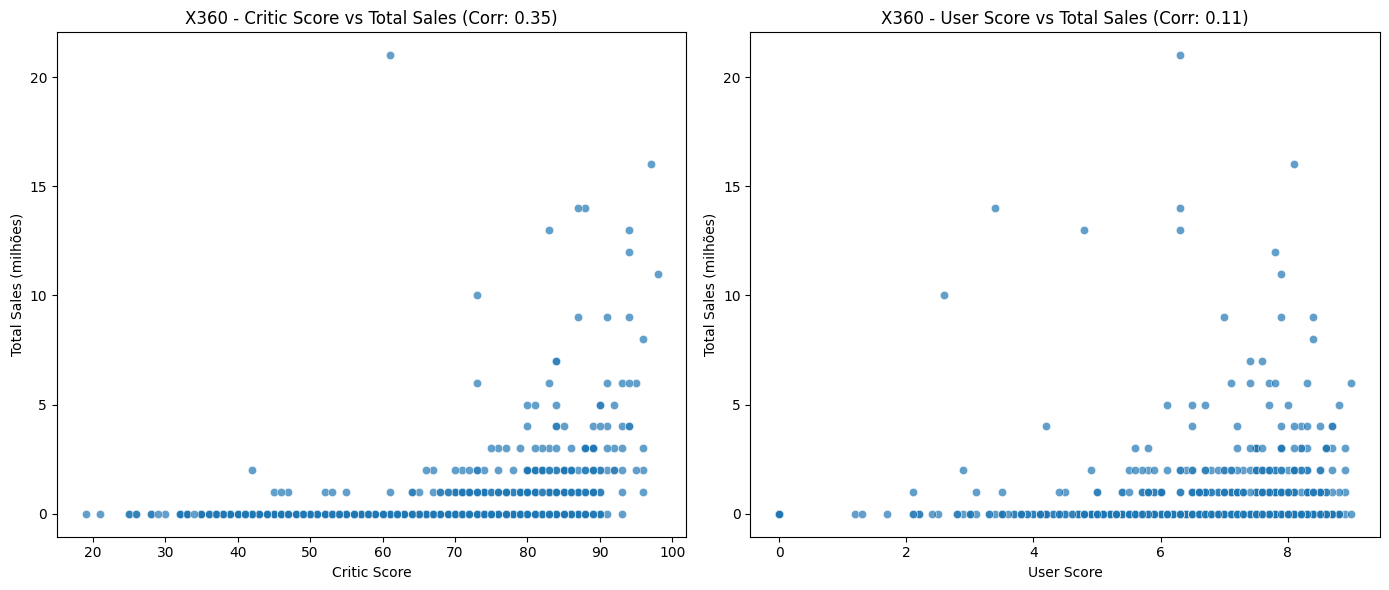

Plataforma: X360
Correlação Pontuação Crítica x Total Sales: 0.35
Correlação Pontuação Usuario x Total Sales: 0.11
--------------------------------------------------


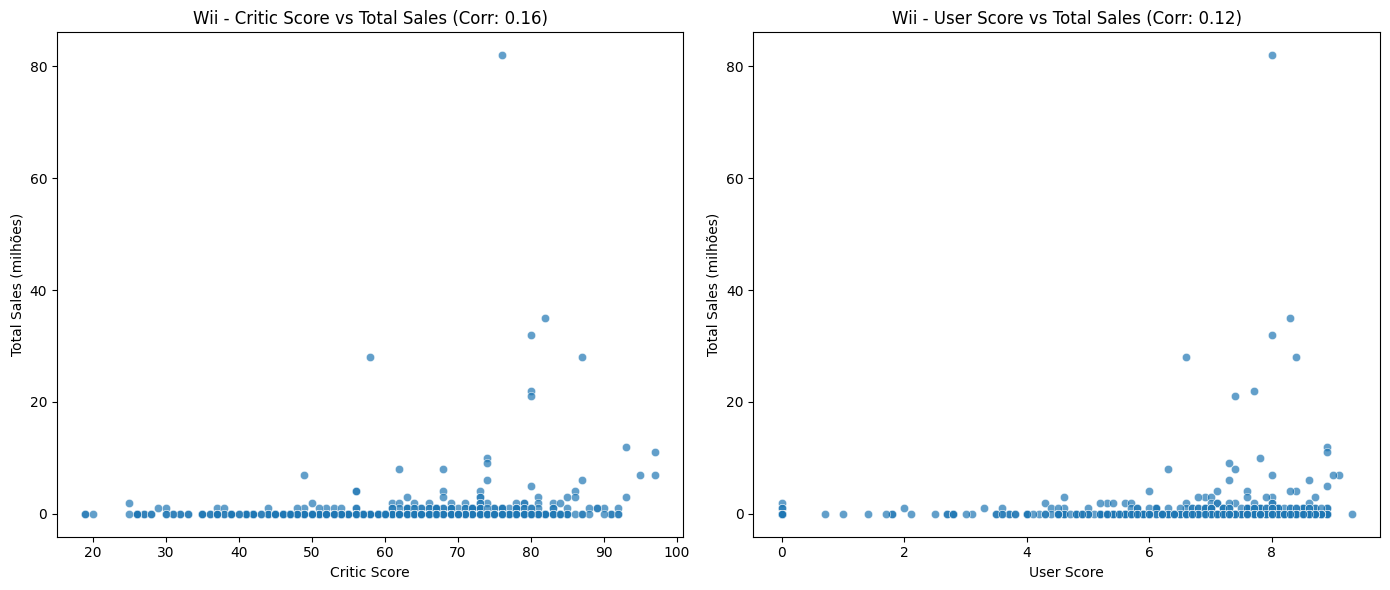

Plataforma: Wii
Correlação Pontuação Crítica x Total Sales: 0.16
Correlação Pontuação Usuario x Total Sales: 0.12
--------------------------------------------------


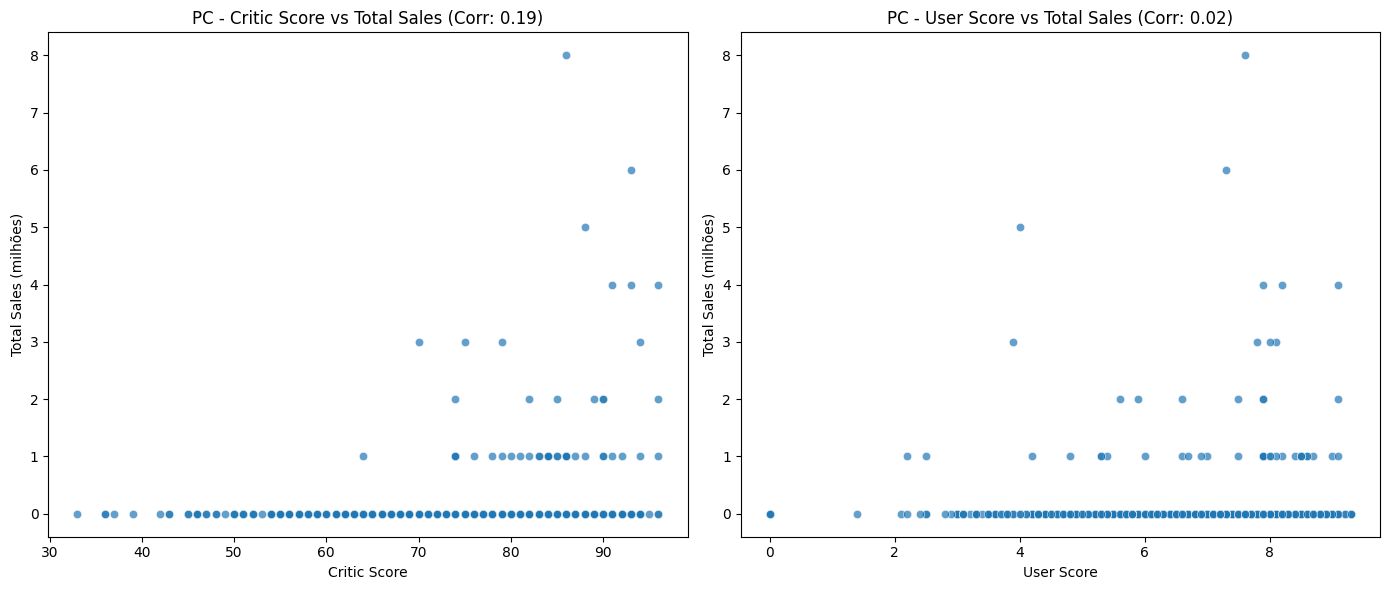

Plataforma: PC
Correlação Pontuação Crítica x Total Sales: 0.19
Correlação Pontuação Usuario x Total Sales: 0.02
--------------------------------------------------


In [28]:
plataformas = ['PS4', 'X360', 'Wii', 'PC']

for platform in plataformas:
    plataforma_data = df_games[df_games['platform'] == platform]
    plataforma_filtrada = plataforma_data[['critic_score', 'user_score', 'total_sales']].dropna()
    critica_corr = plataforma_filtrada['critic_score'].corr(plataforma_filtrada['total_sales'])
    usuario_corr = plataforma_filtrada['user_score'].corr(plataforma_filtrada['total_sales'])

    
    

    plt.figure(figsize=(14, 6))
    
    # critica pontuação vs Total Sales
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='critic_score', y='total_sales', data=plataforma_filtrada, alpha=0.7)
    plt.title(f'{platform} - Critic Score vs Total Sales (Corr: {critica_corr:.2f})')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales (milhões)')
    
    # User Score vs Total Sales
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='user_score', y='total_sales', data=plataforma_filtrada, alpha=0.7)
    plt.title(f'{platform} - User Score vs Total Sales (Corr: {usuario_corr:.2f})')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales (milhões)')
    
    plt.tight_layout()
    plt.show()

    print(f"Plataforma: {platform}")
    print(f"Correlação Pontuação Crítica x Total Sales: {critica_corr:.2f}")
    print(f"Correlação Pontuação Usuario x Total Sales: {usuario_corr:.2f}")
    print("-" * 50)


# . Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

In [29]:
# contagem de jogos por genero
genero_contagem = df_games['genre'].value_counts()
genero_contagem

genre
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: count, dtype: int64

Vendas Totais por Gênero:
genre
Action          889
Shooter         673
Sports          666
Platform        573
Role-Playing    562
Racing          416
Misc            398
Fighting        219
Simulation      191
Puzzle          133
Adventure        72
Strategy         54
Name: total_sales, dtype: int64

Vendas Médias por Gênero:
genre
Platform        0.652620
Shooter         0.519290
Role-Playing    0.379473
Racing          0.339315
Sports          0.288812
Action          0.268824
Fighting        0.261649
Puzzle          0.233743
Misc            0.231261
Simulation      0.222870
Strategy        0.080238
Adventure       0.055684
Name: total_sales, dtype: float64

Contagem de Jogos por Gênero:
genre
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: count, dtype: int64


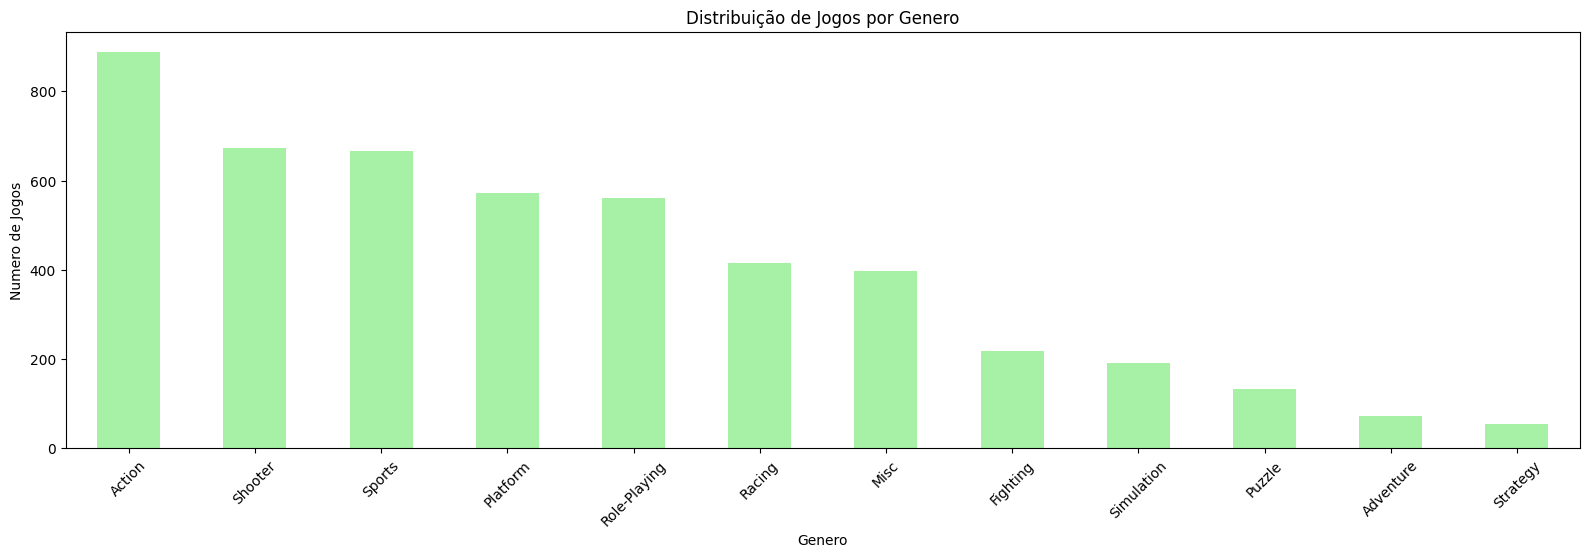

In [30]:
vendas_totais_genero = df_games.groupby('genre')['total_sales'].sum()
vendas_medias_genero = df_games.groupby('genre')['total_sales'].mean()

plt.figure(figsize=(16, 10))

plt.subplot(2,1,1)
vendas_totais_genero.sort_values(ascending=False).plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('Distribuição de Jogos por Genero')
plt.xlabel('Genero')
plt.ylabel('Numero de Jogos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show

print("Vendas Totais por Gênero:")
print(vendas_totais_genero.sort_values(ascending=False))

print("\nVendas Médias por Gênero:")
print(vendas_medias_genero.sort_values(ascending=False))

print("\nContagem de Jogos por Gênero:")
print(genero_contagem)

Action, Shooter e Sports, são os generos mais lucrativos,devido a sua ampla base de jogadores. 

Puzzle e Adventure tem vendas totais menores do que o resto dos generos. Geralmente tem menos jogos e são muito nichados.

## Analisando o grafico, podemos tirar as seguintes conclusões:


Action (3.307 jogos):  
É o gênero mais comum, possivelmente devido à sua ampla popularidade e à versatilidade de jogos que se enquadram nessa categoria.
Jogos de ação geralmente abrangem uma vasta gama de estilos, o que ajuda a atrair muitos desenvolvedores.

Sports (2.306 jogos):  
Jogos de esportes têm um apelo universal, com títulos populares como FIFA e Madden dominando o gênero.

Misc (1.721 jogos):  
"Misc" geralmente inclui jogos que não se encaixam perfeitamente em outros gêneros. Pode representar uma categoria heterogênea.

Puzzle (569 jogos):  
Embora menos comum, jogos de puzzle têm um público de nicho. Exemplos incluem Tetris e Candy Crush.

Strategy (673 jogos):  
Jogos de estratégia têm uma base de jogadores dedicada, mas a complexidade pode limitar seu apelo para um público mais amplo.

Fighting (837 jogos):  
Esse gênero inclui franquias icônicas como Street Fighter e Tekken, mas o número total de títulos é menor.

##  Generalizações sobre a Distribuição:  

Gêneros como Action, Sports, e Role-Playing tendem a atrair um público diversificado, o que explica seu grande número de jogos.

Gêneros de nicho:  
Gêneros como Puzzle e Strategy têm menos jogos disponíveis, provavelmente porque atraem públicos menores ou mais especializados.

Misc:  
Essa categoria precisa de um estudo adicional, pois pode incluir jogos que não se encaixam bem nas definições padrão de gênero.

# . Crie um perfil de usuário para cada região

## Para cada região (AN, UE, JP), determine:

- As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.  
- Os cinco principais gêneros. Explique a diferença.  
- As classificações do ESRB afetam as vendas em regiões individuais?  

In [31]:
# Etapa 1: Determinar as 5 principais plataformas por região
def principais_plataformas_por_regiao(df, regiao):
    vendas_por_plataforma = df.groupby('platform')[f'{regiao}_sales'].sum()
    principais = vendas_por_plataforma.sort_values(ascending=False).head(5)
    total_vendas = vendas_por_plataforma.sum()
    quotas = (principais / total_vendas) * 100
    return principais, quotas


In [32]:
# Etapa 2: Determinar os 5 principais gêneros por região
def principais_generos_por_regiao(df, regiao):
    vendas_por_genero = df.groupby('genre')[f'{regiao}_sales'].sum()
    principais = vendas_por_genero.sort_values(ascending=False).head(5)
    return principais

In [33]:
# Etapa 3: Analisar o impacto das classificações ESRB por região
def impacto_esrb_por_regiao(df, regiao):
    vendas_por_classificacao = df.groupby('rating')[f'{regiao}_sales'].sum()
    return vendas_por_classificacao.sort_values(ascending=False)

regioes = ['na', 'eu', 'jp']

In [34]:
# Região: NA
print("--- Análise para a região: NA ---")
principais_plataformas_na, quotas_plataformas_na = principais_plataformas_por_regiao(df_games, 'na')
print(f"\nPrincipais Plataformas em NA:\n{principais_plataformas_na}")
print(f"Quotas de Mercado em NA:\n{quotas_plataformas_na}")

principais_generos_na = principais_generos_por_regiao(df_games, 'na')
print(f"\nPrincipais Gêneros em NA:\n{principais_generos_na}")

impacto_esrb_na = impacto_esrb_por_regiao(df_games, 'na')
print(f"\nImpacto do ESRB em NA:\n{impacto_esrb_na}")

print("\n" + "-"*50)

--- Análise para a região: NA ---

Principais Plataformas em NA:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
Quotas de Mercado em NA:
platform
X360    13.722238
PS2     13.196604
Wii     11.214533
PS3      8.986230
DS       8.760037
Name: na_sales, dtype: float64

Principais Gêneros em NA:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Impacto do ESRB em NA:
rating
E               1274.24
desconhecido    1225.84
T                747.60
M                742.89
E10+             345.50
K-A                2.56
EC                 1.53
AO                 1.26
RP                 0.00
Name: na_sales, dtype: float64

--------------------------------------------------


Principais Plataformas em NA:
- **X360** lidera as vendas com 595,74 milhões, representando a maior quota de mercado (13,72%).
- **PS2** está logo atrás com 572,92 milhões (13,19% de quota).
- **Wii**, **PS3**, e **DS** também são altamente competitivos na região.

Variações de Quotas de Mercado:  
- Na América do Norte, o Xbox 360 lidera, destacando a forte presença da Microsoft na região. Em contraste, no Japão, plataformas da Sony e Nintendo dominam.
- O PS2, embora esteja em segundo na NA, também aparece como destaque na Europa, mostrando sua força global.
- Consoles portáteis como o DS são menos dominantes na NA comparados ao Japão.

In [35]:
# Região: EU
print("--- Análise para a região: EU ---")
principais_plataformas_eu, quotas_plataformas_eu = principais_plataformas_por_regiao(df_games, 'eu')
print(f"\nPrincipais Plataformas em EU:\n{principais_plataformas_eu}")
print(f"Quotas de Mercado em EU:\n{quotas_plataformas_eu}")

principais_generos_eu = principais_generos_por_regiao(df_games, 'eu')
print(f"\nPrincipais Gêneros em EU:\n{principais_generos_eu}")

impacto_esrb_eu = impacto_esrb_por_regiao(df_games, 'eu')
print(f"\nImpacto do ESRB em EU:\n{impacto_esrb_eu}")

print("\n" + "-"*50)

--- Análise para a região: EU ---

Principais Plataformas em EU:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64
Quotas de Mercado em EU:
platform
PS2     13.861432
PS3     13.635568
X360    11.181491
Wii     10.764769
PS       8.850763
Name: eu_sales, dtype: float64

Principais Gêneros em EU:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

Impacto do ESRB em EU:
rating
E               703.87
desconhecido    609.65
M               480.00
T               421.79
E10+            183.35
AO                0.61
K-A               0.27
EC                0.11
RP                0.03
Name: eu_sales, dtype: float64

--------------------------------------------------


Principais Plataformas em EU: 

PS2, PS3, X360, Wii, e PS.  

Variações regionais:  
- A Europa favorece a Sony, com o PS2 e PS3 liderando, devido à grande base instalada e à ampla biblioteca de jogos.
- O X360 ocupa uma posição forte, mas abaixo dos consoles da Sony, possivelmente devido a uma menor penetração de mercado.
- O PS (PlayStation) ainda aparece entre os líderes, destacando o impacto de consoles clássicos na Europa.

In [36]:
# Região: JP
print("--- Análise para a região: JP ---")
principais_plataformas_jp, quotas_plataformas_jp = principais_plataformas_por_regiao(df_games, 'jp')
print(f"\nPrincipais Plataformas em JP:\n{principais_plataformas_jp}")
print(f"Quotas de Mercado em JP:\n{quotas_plataformas_jp}")

principais_generos_jp = principais_generos_por_regiao(df_games, 'jp')
print(f"\nPrincipais Gêneros em JP:\n{principais_generos_jp}")

impacto_esrb_jp = impacto_esrb_por_regiao(df_games, 'jp')
print(f"\nImpacto do ESRB em JP:\n{impacto_esrb_jp}")

print("\n" + "-"*50)

--- Análise para a região: JP ---

Principais Plataformas em JP:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64
Quotas de Mercado em JP:
platform
DS      13.560714
PS      10.830286
PS2     10.656728
SNES     9.030404
3DS      7.796132
Name: jp_sales, dtype: float64

Principais Gêneros em JP:
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64

Impacto do ESRB em JP:
rating
desconhecido    836.74
E               197.96
T               150.70
M                63.58
E10+             40.20
K-A               1.46
AO                0.00
EC                0.00
RP                0.00
Name: jp_sales, dtype: float64

--------------------------------------------------


Plataformas principais:

DS, PS, PS2, SNES, e 3DS.  

Variações regionais:
- O mercado japonês é mais voltado para consoles portáteis (DS, 3DS) e plataformas clássicas (SNES, PS).
- A forte preferência por portáteis no Japão reflete o estilo de vida mais dinâmico, com jogos focados - em RPGs e experiências single-player.

Resumo das variações:  

- A Microsoft domina na NA com o X360, mas tem menor impacto em outras regiões.
- A Sony é consistente na Europa e no Japão, com o PS2 e PS3 desempenhando bem.
- O mercado japonês favorece consoles portáteis e franquias locais.


## Teste de Hipotese


In [37]:
notas_xbox = df_games[df_games['platform'] == 'X360']['user_score'].dropna()
notas_pc = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

notas_acao = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
notas_esportes = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()

action_scores = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()

alfa = 0.05


estatistica_t_1, valor_p_1 = stats.ttest_ind(notas_xbox, notas_pc, equal_var=False)


1ª Hipótese: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

Formulação das hipóteses:  

Hipótese nula: As classificações médias dos usuários para as plataformas Xbox One e PC são iguais.  

Hipótese alternativa: As classificações médias dos usuários para as plataformas Xbox One e PC não são iguais.

In [38]:
# Decisão para a Hipótese 1
print("Hipótese 1: Comparação entre Xbox One e PC")
print(f"Estatística T: {estatistica_t_1:.2f}, Valor P: {valor_p_1:.4f}")
if valor_p_1 < alfa:
    print("Rejeitamos H0: As classificações médias dos usuários são diferentes.")
else:
    print("Não rejeitamos H0: As classificações médias dos usuários são iguais.")
print("-" * 50)

Hipótese 1: Comparação entre Xbox One e PC
Estatística T: -4.63, Valor P: 0.0000
Rejeitamos H0: As classificações médias dos usuários são diferentes.
--------------------------------------------------


**Com um valor p de 0.0000, rejeitamos a hipotese nula. As classificações médias dos usuários para as plataformas Xbox One e PC são significativamente diferentes.*

2ª Hipótese: As classificações médias de usuários para os gêneros Action e Sports são diferentes.

Formulação das hipóteses:  

Hipótese nula: As classificações médias dos usuários para os gêneros Action e Sports são iguais.  

Hipótese alternativa: As classificações médias dos usuários para os gêneros Action e Sports são diferentes.

In [39]:
# Hipótese 2
t_stat_2, p_value_2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

# Decisão para a Hipótese 2
print("Hipótese 2: Comparação entre gêneros Action e Sports")
print(f"T-Statistic: {t_stat_2:.2f}, P-Value: {p_value_2:.4f}")
if p_value_2 < alfa:
    print("Rejeitamos H0: As classificações médias dos gêneros são diferentes.")
else:
    print("Não rejeitamos H0: As classificações médias dos gêneros são iguais.")
print("-" * 50)

Hipótese 2: Comparação entre gêneros Action e Sports
T-Statistic: 7.42, P-Value: 0.0000
Rejeitamos H0: As classificações médias dos gêneros são diferentes.
--------------------------------------------------


**Com um valor p de 0.0000, rejeitamos a hipotese nula. As classificações médias dos gêneros Action e Sports também são significativamente diferentes. Isso pode indicar que os jogadores têm percepções muito distintas sobre jogos desses gêneros, seja pela jogabilidade, inovação ou apelo.*

Formulamos as hipoteses nula e alternativa seguindo alguns criterios:

- Utilizamos o teste T para duas amostras independentes.
- O nivel de significancia (alfa) definimos 0.05.
- Para tomada de decisão decidimos rejeitar Hₒ se o p-valor do teste for menor que alfa

## Conclusão geral

**Período Relevante para os Dados:**

O intervalo de 2001 a 2016 concentra a maior parte dos lançamentos de jogos e vendas significativas, sendo o período mais adequado para análises e previsões futuras. Anos anteriores têm impacto limitado.  

**Plataformas Dominantes e Variações Regionais:**

**América do Norte (NA):** O Xbox 360 (13,72%) lidera, mostrando a força da Microsoft na região, seguido pelo PS2 e Wii.
**Europa (EU):** A Sony domina com o PS2 e PS3, enquanto o Xbox 360 tem menor penetração.
**Japão (JP):** Consoles portáteis (DS, 3DS) e clássicos (PS, SNES) são mais populares, refletindo preferências locais por jogos single-player e RPGs.

**Gêneros Mais Lucrativos:**

Action, Sports, e Shooter lideram globalmente devido ao apelo amplo e diversidade de estilos.
Gêneros como Puzzle e Strategy têm vendas menores e atendem a públicos de nicho.

**Impacto das Avaliações:**

**Pontuações de Críticos:** Têm uma correlação moderada com vendas, indicando que jogos bem avaliados por críticos tendem a vender mais.
**Pontuações de Usuários:** Têm baixa correlação, sugerindo que a percepção dos jogadores impacta menos diretamente as vendas.

**Diferenças nas Classificações:**

**Plataformas (Xbox One vs. PC):** As classificações médias dos usuários diferem significativamente, refletindo diferenças no público-alvo e na qualidade percebida dos jogos.
**Gêneros (Action vs. Sports):** As classificações também diferem, indicando percepções distintas sobre a jogabilidade e apelo de cada gênero.

**Ciclo de Vida das Plataformas:**

As plataformas tendem a ter um pico de vendas nos primeiros anos após o lançamento, seguido por um declínio acentuado.
Plataformas como PS3, X360, e PS4 demonstram potencial contínuo em vendas.

**Generalização dos Dados:**

Gêneros amplos (Action, Sports) dominam o mercado devido ao apelo universal, enquanto nichos como Puzzle e Strategy têm menos relevância em volume.

*Resumo Final*:

As plataformas e gêneros variam amplamente entre regiões devido a diferenças culturais, preferências locais e estratégias de mercado. Consoles modernos como PS4, gêneros como Action, e mercados regionais focados (como o Japão com RPGs) devem ser priorizados para estratégias futuras. Avaliações críticas influenciam vendas mais do que avaliações de usuários, destacando a importância do marketing e da reputação profissional.